In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = None
pd.options.display.max_rows = None

pd.options.display.max_colwidth=-1

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
#import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


import re

In [2]:
%pwd

'/Users/abhyudayjampu/Documents/ISME'

In [3]:
cd /Users/abhyudayjampu/Documents/ISME

/Users/abhyudayjampu/Documents/ISME


In [4]:
churn=pd.read_csv("Churn.csv")

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female  0              Yes     No         1       No            
1  5575-GNVDE  Male    0              No      No         34      Yes           
2  3668-QPYBK  Male    0              No      No         2       Yes           
3  7795-CFOCW  Male    0              No      No         45      No            
4  9237-HQITU  Female  0              No      No         2       Yes           

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service  DSL             No             Yes           
1  No                DSL             Yes            No            
2  No                DSL             Yes            Yes           
3  No phone service  DSL             Yes            No            
4  No                Fiber optic     No             No            

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0  No               No          No          No              Month-to-month   
1  Yes              No          No          No              One year         
2  No               No          No          No              Month-to-month   
3  Yes              Yes         No          No              One year         
4  No               No          No          No              Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0  Yes              Electronic check           29.85           29.85         
1  No               Mailed check               56.95           1889.5        
2  Yes              Mailed check               53.85           108.15        
3  No               Bank transfer (automatic)  42.30           1840.75       
4  Yes              Electronic check           70.70           151.65        

  Churn  
0  No    
1  No    
2  Yes   
3  No    
4  Yes

In [11]:
churn.describe()

SeniorCitizen       tenure  MonthlyCharges
count  7043.000000    7043.000000  7043.000000   
mean   0.162147       32.371149    64.761692     
std    0.368612       24.559481    30.090047     
min    0.000000       0.000000     18.250000     
25%    0.000000       9.000000     35.500000     
50%    0.000000       29.000000    70.350000     
75%    0.000000       55.000000    89.850000     
max    1.000000       72.000000    118.750000

In [12]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

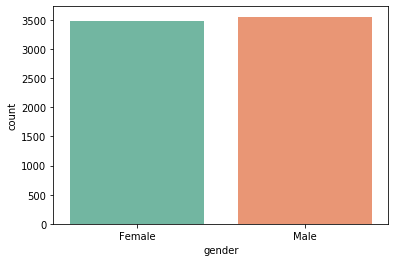

In [13]:
sns.countplot(x='gender',data=churn,palette='Set2')

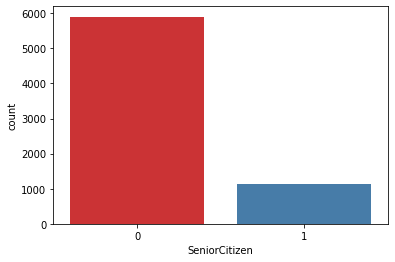

In [14]:
sns.countplot(x='SeniorCitizen',data=churn,palette='Set1')

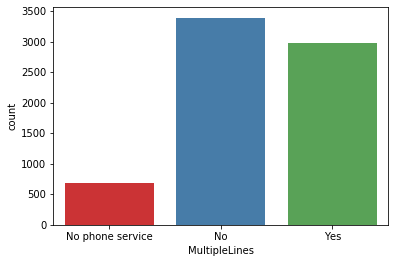

In [15]:
sns.countplot(x='MultipleLines',data=churn,palette='Set1')

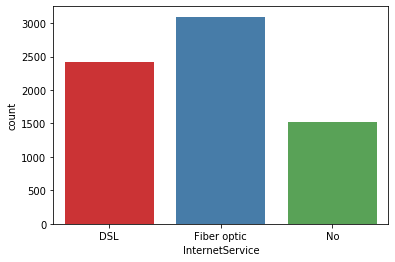

In [16]:
sns.countplot(x='InternetService',data=churn,palette='Set1')

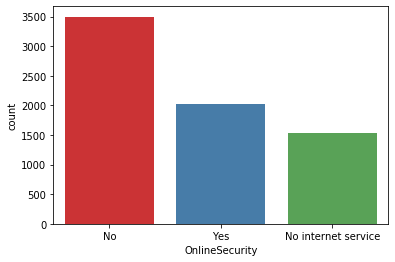

In [17]:
sns.countplot(x='OnlineSecurity',data=churn,palette='Set1')

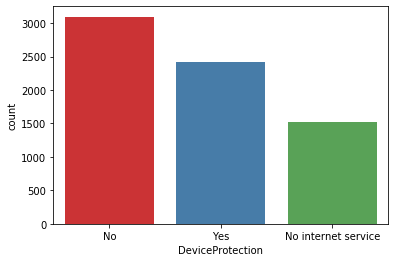

In [18]:
sns.countplot(x='DeviceProtection',data=churn,palette='Set1')

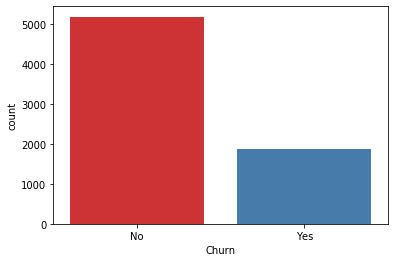

In [19]:
sns.countplot(x='Churn',data=churn,palette='Set1')

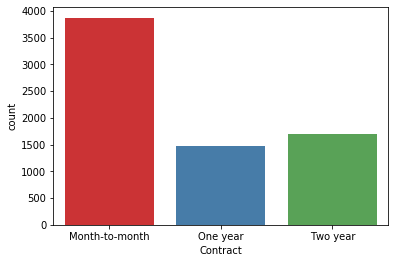

In [20]:
sns.countplot(x='Contract',data=churn,palette='Set1')

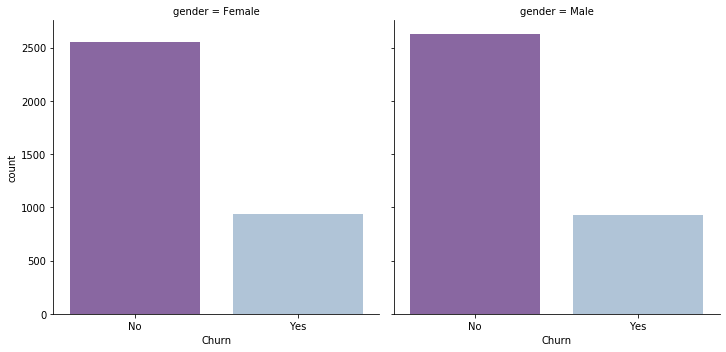

In [21]:
sns.catplot(x='Churn',data=churn,palette='BuPu_r',col='gender',kind='count')

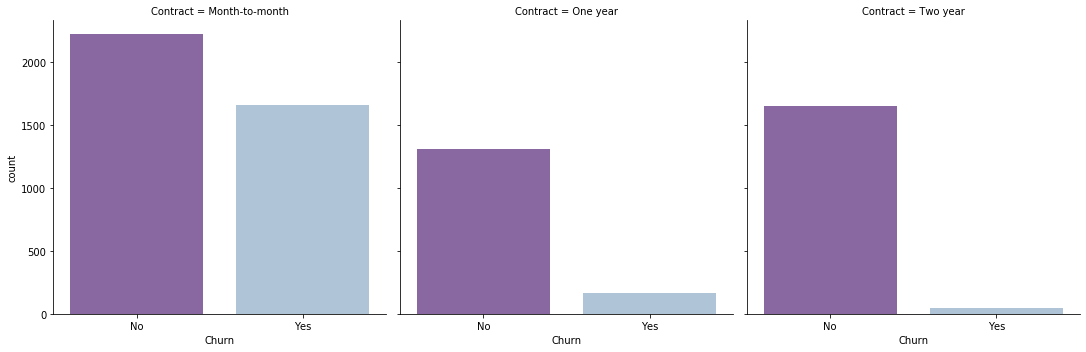

In [23]:
sns.catplot(x='Churn',data=churn,palette='BuPu_r',col='Contract',kind='count')

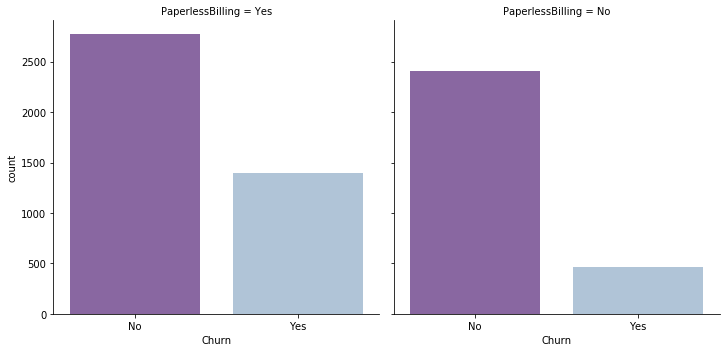

In [24]:
sns.catplot(x='Churn',data=churn,palette='BuPu_r',col='PaperlessBilling',kind='count')

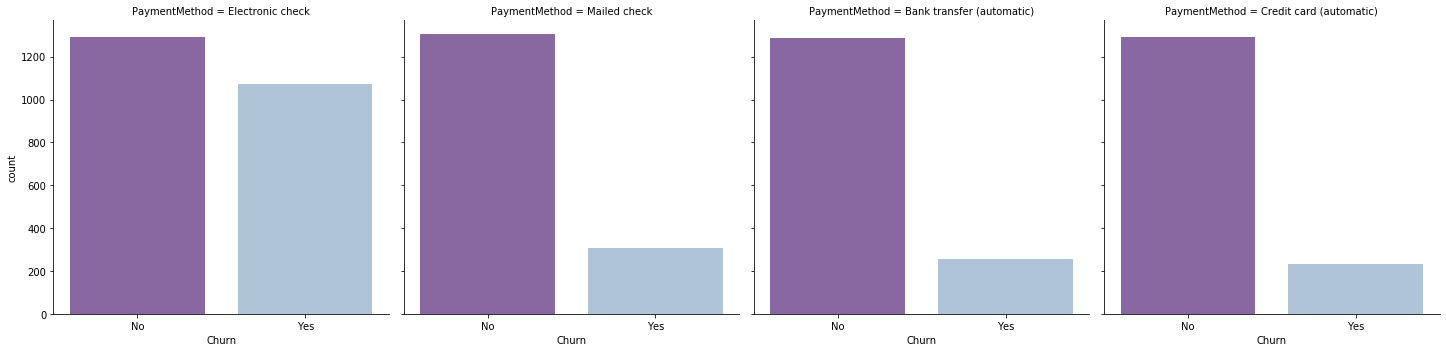

In [26]:
sns.catplot(x='Churn',data=churn,palette='BuPu_r',col='PaymentMethod',kind='count')

(array([1606.,  191.,  365.,  639.,  473.,  895.,  953.,  869.,  758.,
         294.]),
 array([ 18.25,  28.3 ,  38.35,  48.4 ,  58.45,  68.5 ,  78.55,  88.6 ,
         98.65, 108.7 , 118.75]),
 <a list of 10 Patch objects>)

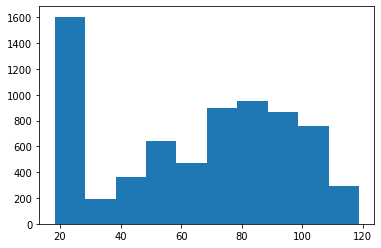

In [27]:
plt.hist(churn['MonthlyCharges'],bins=10)

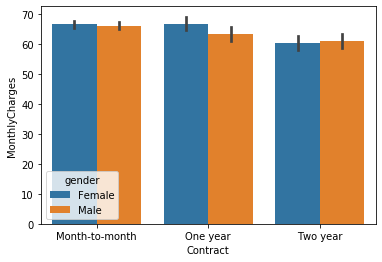

In [28]:
sns.barplot(x='Contract',y='MonthlyCharges',hue='gender',data=churn)

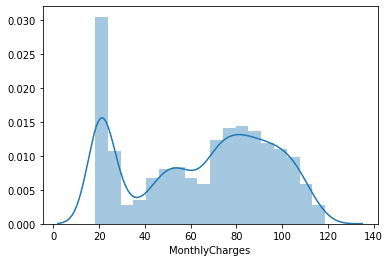

In [29]:
sns.distplot(churn['MonthlyCharges'])

In [31]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [34]:
churn['Churn']=churn['Churn'].replace({"Yes":1,"No":0}) #replacing 1 for yes and 0 for no

In [35]:
churn['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [36]:
churn['Churn'].mean()

0.2653698707936959

Churn rate is 26%

In [39]:
churn.groupby(['gender','SeniorCitizen','PhoneService','InternetService','MultipleLines'])['Churn'].mean()

gender  SeniorCitizen  PhoneService  InternetService  MultipleLines   
Female  0              No            DSL              No phone service    0.206294
                       Yes           DSL              No                  0.189873
                                                      Yes                 0.104918
                                     Fiber optic      No                  0.495475
                                                      Yes                 0.358079
                                     No               No                  0.087500
                                                      Yes                 0.024096
        1              No            DSL              No phone service    0.466667
                       Yes           DSL              No                  0.333333
                                                      Yes                 0.133333
                                     Fiber optic      No                  0.482993
                

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


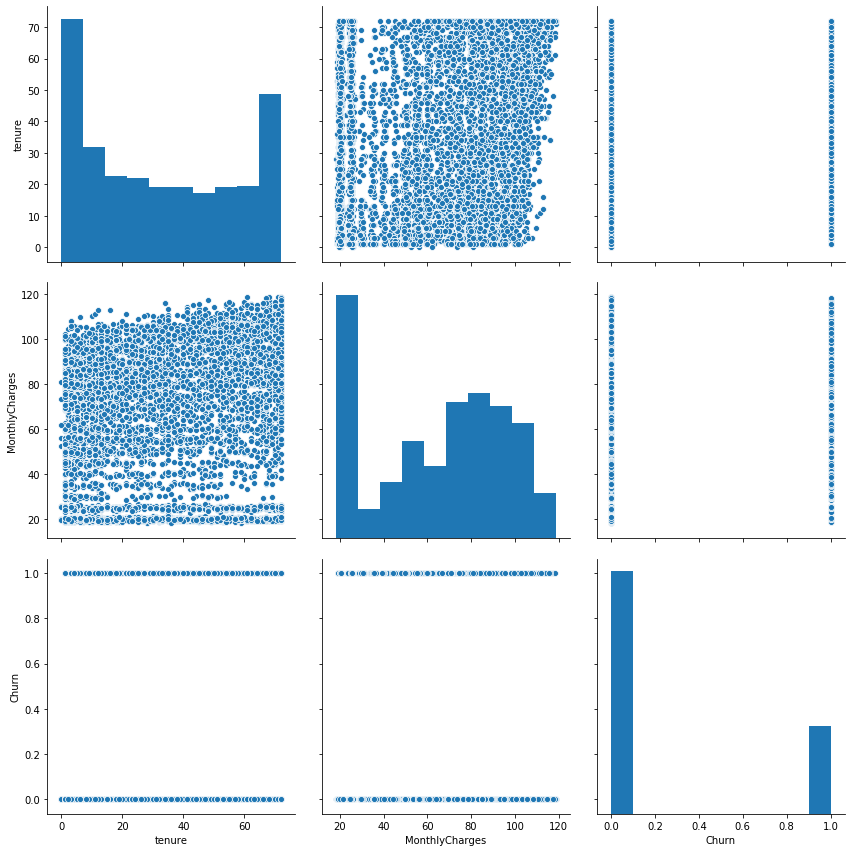

In [41]:
influential_features=['tenure','TotalCharges','MonthlyCharges','Churn']
sns.pairplot(churn[influential_features],size=4)

# OneHot Encoding

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [45]:
le=LabelEncoder()
data=churn.copy()
data.head(20)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female  0              Yes     No         1       No            
1   5575-GNVDE  Male    0              No      No         34      Yes           
2   3668-QPYBK  Male    0              No      No         2       Yes           
3   7795-CFOCW  Male    0              No      No         45      No            
4   9237-HQITU  Female  0              No      No         2       Yes           
5   9305-CDSKC  Female  0              No      No         8       Yes           
6   1452-KIOVK  Male    0              No      Yes        22      Yes           
7   6713-OKOMC  Female  0              No      No         10      No            
8   7892-POOKP  Female  0              Yes     No         28      Yes           
9   6388-TABGU  Male    0              No      Yes        62      Yes           
10  9763-GRSKD  Male    0              Yes     Yes        13      Yes           
11  7469-LKBCI  Male    0              No      No         16      Yes           
12  8091-TTVAX  Male    0              Yes     No         58      Yes           
13  0280-XJGEX  Male    0              No      No         49      Yes           
14  5129-JLPIS  Male    0              No      No         25      Yes           
15  3655-SNQYZ  Female  0              Yes     Yes        69      Yes           
16  8191-XWSZG  Female  0              No      No         52      Yes           
17  9959-WOFKT  Male    0              No      Yes        71      Yes           
18  4190-MFLUW  Female  0              Yes     Yes        10      Yes           
19  4183-MYFRB  Female  0              No      No         21      Yes           

       MultipleLines InternetService       OnlineSecurity  \
0   No phone service  DSL             No                    
1   No                DSL             Yes                   
2   No                DSL             Yes                   
3   No phone service  DSL             Yes                   
4   No                Fiber optic     No                    
5   Yes               Fiber optic     No                    
6   Yes               Fiber optic     No                    
7   No phone service  DSL             Yes                   
8   Yes               Fiber optic     No                    
9   No                DSL             Yes                   
10  No                DSL             Yes                   
11  No                No              No internet service   
12  Yes               Fiber optic     No                    
13  Yes               Fiber optic     No                    
14  No                Fiber optic     Yes                   
15  Yes               Fiber optic     Yes                   
16  No                No              No internet service   
17  Yes               Fiber optic     Yes                   
18  No                DSL             No                    
19  No                Fiber optic     No                    

           OnlineBackup     DeviceProtection          TechSupport  \
0   Yes                  No                   No                    
1   No                   Yes                  No                    
2   Yes                  No                   No                    
3   No                   Yes                  Yes                   
4   No                   No                   No                    
5   No                   Yes                  No                    
6   Yes                  No                   No                    
7   No                   No                   No                    
8   No                   Yes                  Yes                   
9   Yes                  No                   No                    
10  No                   No                   No                    
11  No internet service  No internet service  No internet service   
12  No                   Yes                  No                    
13  Yes                  Yes                  No      

In [46]:
churn["OnlineSecurity"] = churn["OnlineSecurity"].replace({"No internet service":"No"})
churn["OnlineSecurity"].value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [47]:
churn['DeviceProtection']=churn["DeviceProtection"].replace({"No internet service":"No"})
churn["DeviceProtection"].value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

In [54]:
churn["TechSupport"]=churn["TechSupport"].replace({"No internet service":"No"})
churn["StreamingTV"]=churn["StreamingTV"].replace({"No internet service":"No"})
churn["StreamingMovies"]=churn["StreamingMovies"].replace({"No internet service":"No"})
churn["MultipleLines"]=churn["MultipleLines"].replace({"No phone service":"No"})

In [55]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female  0              Yes     No         1       No            
1  5575-GNVDE  Male    0              No      No         34      Yes           
2  3668-QPYBK  Male    0              No      No         2       Yes           
3  7795-CFOCW  Male    0              No      No         45      No            
4  9237-HQITU  Female  0              No      No         2       Yes           

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service  DSL             No             Yes           
1  No                DSL             Yes            No            
2  No                DSL             Yes            Yes           
3  No phone service  DSL             Yes            No            
4  No                Fiber optic     No             No            

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0  No               No          No          No              Month-to-month   
1  Yes              No          No          No              One year         
2  No               No          No          No              Month-to-month   
3  Yes              Yes         No          No              One year         
4  No               No          No          No              Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0  Yes              Electronic check           29.85           29.85         
1  No               Mailed check               56.95           1889.5        
2  Yes              Mailed check               53.85           108.15        
3  No               Bank transfer (automatic)  42.30           1840.75       
4  Yes              Electronic check           70.70           151.65        

   Churn  
0  0      
1  0      
2  1      
3  0      
4  1

In [56]:
for i in data.columns[:-1]:
    data[i]=le.fit_transform(data[i])

data.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  5375        0       0              1        0           1        
1  3962        1       0              0        0           34       
2  2564        1       0              0        0           2        
3  5535        1       0              0        0           45       
4  6511        0       0              0        0           2        

   PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0  0             1              0                0               2              
1  1             0              0                2               0              
2  1             0              0                2               2              
3  0             1              0                2               0              
4  1             0              1                0               0              

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0  0                 0            0            0                0          
1  2                 0            0            0                1          
2  0                 0            0            0                0          
3  2                 2            0            0                1          
4  0                 0            0            0                0          

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0  1                 2              142             2505          0      
1  0                 3              498             1466          0      
2  1                 3              436             157           1      
3  0                 0              266             1400          0      
4  1                 2              729             925           1

In [58]:
data=data.drop('customerID',axis=1)

In [59]:
data.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  0       0              1        0           1       0              
1  1       0              0        0           34      1              
2  1       0              0        0           2       1              
3  1       0              0        0           45      0              
4  0       0              0        0           2       1              

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0  1              0                0               2              
1  0              0                2               0              
2  0              0                2               2              
3  1              0                2               0              
4  0              1                0               0              

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0  0                 0            0            0                0          
1  2                 0            0            0                1          
2  0                 0            0            0                0          
3  2                 2            0            0                1          
4  0                 0            0            0                0          

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0  1                 2              142             2505          0      
1  0                 3              498             1466          0      
2  1                 3              436             157           1      
3  0                 0              266             1400          0      
4  1                 2              729             925           1

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null int64
TotalCharges        7043 non-null int64
Churn               7043 non-null int64
dtypes: int64(20)
memory usage: 1.1 MB


In [61]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
onehotencoder = OneHotEncoder(categorical_features = 'all')

In [66]:
df = onehotencoder.fit_transform(data).toarray()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:441: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. The passed value of 'all' is the default and can simply be removed.
  DeprecationWarning)


In [67]:
df=pd.DataFrame(df)
df.head(5)

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0   

    90   91   92   93   94   95   96   97   98   99  100  101  102  103  104  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
1  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
4  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   

   105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

   120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [68]:
data_encoded=pd.DataFrame(df)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 8234 entries, 0 to 8233
dtypes: float64(8234)
memory usage: 442.4 MB


In [70]:
data_encoded['class']=churn['Churn']

In [71]:
data_encoded.head()

0    1    2    3    4    5    6    7    8    9   10   11   12   13   14  \
0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19   20   21   22   23   24   25   26   27   28   29  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    30   31   32   33   34   35   36   37   38   39   40   41   42   43   44  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    45   46   47   48   49   50   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    60   61   62   63   64   65   66   67   68   69   70   71   72   73   74  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    75   76   77   78   79   80   81   82   83   84   85   86   87   88   89  \
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0   

    90   91   92   93   94   95   96   97   98   99  100  101  102  103  104  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
1  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0   
4  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   

   105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  \
0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   

   120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

# Logistic Regression

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [73]:
x=data_encoded.columns[:-1]
x_train,x_test,y_train,y_test=train_test_split(data_encoded[x],data_encoded['class'])

In [74]:
print(x_train.shape,y_train.shape)

(5282, 8234) (5282,)


In [75]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [76]:
print(y_train.shape,y_train.shape)

(5282,) (5282,)


In [77]:
model=LogisticRegression()
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
predicted_class=model.predict(x_test)

In [79]:
accuracy=accuracy_score(y_test,predicted_class)
accuracy

0.9965928449744463

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
y_pred=model.predict(x_test)

In [82]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1287,    6],
       [   0,  468]])

From above Confusion Matrix we can say that only 6 falsely predicted observationd are found and the rest are predicted correctly

# XG Boost

In [83]:
!pip install xgboost

     |████████████████████████████████| 686kB 173kB/s eta 0:00:01
  Created wheel for xgboost: filename=xgboost-0.90-cp37-cp37m-macosx_10_9_x86_64.whl size=1710237 sha256=6edd24b0ae08561cc70062b3bc787de9edf0d0f54829ca330f661211458ee740
  Stored in directory: /Users/abhyudayjampu/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost


In [84]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [85]:
df=pd.read_csv('Churn.csv',sep=",")

In [86]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female  0              Yes     No         1       No            
1  5575-GNVDE  Male    0              No      No         34      Yes           
2  3668-QPYBK  Male    0              No      No         2       Yes           
3  7795-CFOCW  Male    0              No      No         45      No            
4  9237-HQITU  Female  0              No      No         2       Yes           

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service  DSL             No             Yes           
1  No                DSL             Yes            No            
2  No                DSL             Yes            Yes           
3  No phone service  DSL             Yes            No            
4  No                Fiber optic     No             No            

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0  No               No          No          No              Month-to-month   
1  Yes              No          No          No              One year         
2  No               No          No          No              Month-to-month   
3  Yes              Yes         No          No              One year         
4  No               No          No          No              Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0  Yes              Electronic check           29.85           29.85         
1  No               Mailed check               56.95           1889.5        
2  Yes              Mailed check               53.85           108.15        
3  No               Bank transfer (automatic)  42.30           1840.75       
4  Yes              Electronic check           70.70           151.65        

  Churn  
0  No    
1  No    
2  Yes   
3  No    
4  Yes

In [87]:
x=data.iloc[:,[1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
y=df.iloc[:,19].values

In [88]:
x=data_encoded.columns[:-1]
seed = 7
test_size = 0.33 #Test Size is 33%
x_train,x_test,y_train,y_test=train_test_split(data_encoded[x],data_encoded['class'])

In [89]:
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [90]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [91]:
y_pred=model.predict(x_test)
predictions=[round(value) for value in y_pred]

In [92]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
y_pred=model.predict(x_test)

In [95]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1313,    0],
       [   0,  448]])

In [96]:
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [97]:
pred = pd.DataFrame(y_pred)

In [98]:
pred[0].value_counts()  #1-Yes 0-No

0    1313
1    448 
Name: 0, dtype: int64

448 users could churn which is relatively less